In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
import librosa
from IPython.display import Audio


Get Data

In [3]:
features = pd.read_csv(os.path.join("../../","fma_metadata", "features.csv"), index_col=[0], header=[0,1,2])

In [4]:
tracks = pd.read_csv(os.path.join("../../", "fma_metadata", "tracks.csv"), index_col=[0], header=[0,1])

In [5]:
genres = pd.read_csv(os.path.join("../../", "fma_metadata", "genres.csv"))

In [6]:
genres.sort_values('#tracks')[-30:]

,genre_id,#tracks,parent,title,top_level
35,45,2469,12,Loud-Rock,12
40,58,2502,12,Psych-Rock,12
37,47,2546,38,Drone,38
92,183,2809,15,Glitch,15
104,247,2957,38,Musique Concrete,38
25,30,3237,38,Field Recordings,38
102,236,3472,15,IDM,15
53,85,3548,12,Garage,12
4,5,4106,0,Classical,5
3,4,4126,0,Jazz,4


Rock 12

Hiphop 21

Electronic 15

Folk 17

In [7]:
AUDIO_DATA_PATH = '../../fma_small/'
mp3s = []
filenames = []
for genre in os.listdir(AUDIO_DATA_PATH):
    rel_path = AUDIO_DATA_PATH + genre
    if os.path.isdir(rel_path):
        mp3s += [int(bob.strip('.mp3')) for bob in os.listdir(rel_path)]
        filenames += [rel_path + '/' + bob for bob in os.listdir(rel_path)]
# all of the track ids that are in the small fma set

In [8]:
in_small_bool = features.index.isin(mp3s)
features = features[in_small_bool]
tracks = tracks[in_small_bool]

In [9]:
x, fs = librosa.load(filenames[0])

Audio(filenames[0])

In [10]:
zcr = features['zcr']['mean']

In [11]:
cqt = features['chroma_cqt']['mean'][['01','02','03','04','05']]

In [12]:
spect_cent = features['spectral_centroid']['mean']

In [13]:
mfcc = features['mfcc']['mean'][['01','02','03','04','05']]

In [14]:
features = pd.concat([zcr, cqt, spect_cent, mfcc], axis = 1)
col_names = [ 'zcr', 'cqt0', 'cqt1', 'cqt2', 'cqt3', 'cqt4', \
              'spec_cent', 'mfcc0', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4']
features.columns = col_names

SAMPLE_SIZE = 400

tracks['Rock'] = tracks.track.genres.apply(lambda x: True if ('12' in x and '21' not in x and '15' not in x and '17' not in x) else False )
rock_feat = features[list(tracks['Rock'])].sample(SAMPLE_SIZE, random_state=0)
rock_feat['genre'] = 'Rock'

tracks['Hiphop'] = tracks.track.genres.apply(lambda x: True if ('12' not in x and '21' in x and '15' not in x and '17' not in x) else False )
hop_feat = features[list(tracks['Hiphop'])].sample(SAMPLE_SIZE, random_state=0)
hop_feat['genre'] = 'Hiphop'

tracks['Electronic'] = tracks.track.genres.apply(lambda x: True if ('12' not in x and '21' not in x and '15' in x and '17' not in x) else False )
elec_feat = features[list(tracks['Electronic'])].sample(SAMPLE_SIZE, random_state=0)
elec_feat['genre'] = 'Electronic'

tracks['Folk'] = tracks.track.genres.apply(lambda x: True if ('12' not in x and '21' not in x and '15' not in x and '17' in x) else False )
folk_feat = features[list(tracks['Folk'])].sample(SAMPLE_SIZE, random_state=0)
folk_feat['genre'] = 'Folk'

features = pd.concat([rock_feat, hop_feat, elec_feat, folk_feat])

In [15]:
features.to_csv('../data/sampled_features.csv', index = True)

In [16]:
features

,zcr,cqt0,cqt1,cqt2,cqt3,cqt4,spec_cent,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,genre
track_id,,,,,,,,,,,,,
32081,0.057702,0.529531,0.499841,0.521039,0.533653,0.596229,1322.548340,-168.611328,150.510864,-42.042133,60.441593,-11.695156,Rock
138317,0.058061,0.538762,0.542281,0.551309,0.540180,0.600087,1220.237793,-110.392471,157.805649,-44.511337,37.518093,-10.147263,Rock
125817,0.014030,0.307532,0.288744,0.309664,0.317820,0.413866,412.163483,-369.393616,158.995499,57.744366,24.461973,20.091812,Rock
117172,0.029363,0.507552,0.452046,0.472171,0.507152,0.471840,693.699158,-410.308472,125.683067,17.940952,9.591949,15.241721,Rock
131789,0.050367,0.515940,0.684351,0.852430,0.607256,0.417200,1289.890503,-130.175446,147.221588,-11.299978,38.379189,-13.709072,Rock
125825,0.012672,0.380697,0.407970,0.390549,0.342497,0.299854,301.440399,-352.412476,182.711319,41.255470,31.472715,35.745155,Rock
62586,0.044417,0.453059,0.533861,0.610969,0.569625,0.611056,1251.518921,-97.536743,142.490234,-29.775126,56.459694,7.493850,Rock
133276,0.046413,0.498574,0.410018,0.374669,0.497583,0.692163,1071.556274,-149.428757,158.869446,-17.852592,41.778591,-13.286477,Rock
122400,0.057416,0.581058,0.547726,0.543105,0.601892,0.686360,1163.194702,-166.303757,172.946548,-41.460636,11.397969,0.068196,Rock


Dimension Reduction and Scale

In [17]:
import umap.umap_ as umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
just_stats = features[col_names]

In [20]:
just_stats

,zcr,cqt0,cqt1,cqt2,cqt3,cqt4,spec_cent,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4
track_id,,,,,,,,,,,,
32081,0.057702,0.529531,0.499841,0.521039,0.533653,0.596229,1322.548340,-168.611328,150.510864,-42.042133,60.441593,-11.695156
138317,0.058061,0.538762,0.542281,0.551309,0.540180,0.600087,1220.237793,-110.392471,157.805649,-44.511337,37.518093,-10.147263
125817,0.014030,0.307532,0.288744,0.309664,0.317820,0.413866,412.163483,-369.393616,158.995499,57.744366,24.461973,20.091812
117172,0.029363,0.507552,0.452046,0.472171,0.507152,0.471840,693.699158,-410.308472,125.683067,17.940952,9.591949,15.241721
131789,0.050367,0.515940,0.684351,0.852430,0.607256,0.417200,1289.890503,-130.175446,147.221588,-11.299978,38.379189,-13.709072
125825,0.012672,0.380697,0.407970,0.390549,0.342497,0.299854,301.440399,-352.412476,182.711319,41.255470,31.472715,35.745155
62586,0.044417,0.453059,0.533861,0.610969,0.569625,0.611056,1251.518921,-97.536743,142.490234,-29.775126,56.459694,7.493850
133276,0.046413,0.498574,0.410018,0.374669,0.497583,0.692163,1071.556274,-149.428757,158.869446,-17.852592,41.778591,-13.286477
122400,0.057416,0.581058,0.547726,0.543105,0.601892,0.686360,1163.194702,-166.303757,172.946548,-41.460636,11.397969,0.068196


In [21]:
scaled_stats = scaler.fit_transform(just_stats)

In [22]:
scaled_stats

array([[ 0.37025245,  0.26396734,  0.19908233, ..., -1.30384003,
         1.77553606, -1.21300455],
       [ 0.38442217,  0.3295917 ,  0.53766753, ..., -1.39068715,
         0.36412478, -1.09072071],
       [-1.35332273, -1.31439394, -1.48505666, ...,  2.20586204,
        -0.43974701,  1.29817108],
       ...,
       [-0.03141653,  0.25240763,  0.35696823, ..., -0.90622632,
        -0.17782883,  0.40080966],
       [ 0.50440827,  1.64419904,  1.15784128, ..., -0.80191235,
        -0.29781725, -0.74135567],
       [-0.83063537, -0.99456666,  0.06956994, ...,  1.0512116 ,
        -1.36166076,  0.84693731]])

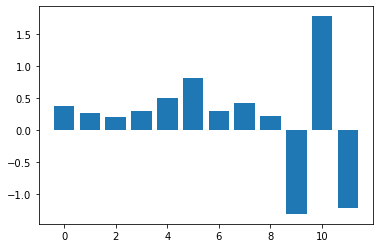

In [23]:
plt.bar(x=range(len(scaled_stats[0])), height=scaled_stats[0])
plt.show()

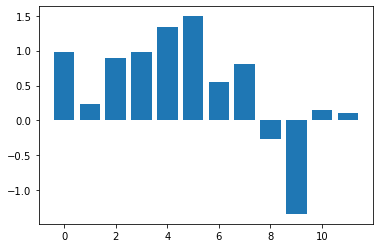

In [24]:
plt.bar(x=range(len(scaled_stats[11])), height=scaled_stats[11])
plt.show()

In [25]:
scaled_stats = pd.DataFrame(scaled_stats, columns = col_names, index = features.index)

In [26]:
scaled_stats['genre'] = features['genre']

In [27]:
scaled_stats

,zcr,cqt0,cqt1,cqt2,cqt3,cqt4,spec_cent,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,genre
track_id,,,,,,,,,,,,,
32081,0.370252,0.263967,0.199082,0.300393,0.497492,0.806820,0.295039,0.417621,0.226284,-1.303840,1.775536,-1.213005,Rock
138317,0.384422,0.329592,0.537668,0.520568,0.549931,0.834164,0.094603,1.080911,0.460520,-1.390687,0.364125,-1.090721,Rock
125817,-1.353323,-1.314394,-1.485057,-1.237120,-1.236457,-0.485637,-1.488490,-1.869900,0.498726,2.205862,-0.439747,1.298171,Rock
117172,-0.748183,0.107697,-0.182225,-0.055072,0.284593,-0.074762,-0.936935,-2.336045,-0.570938,0.805892,-1.355302,0.915013,Rock
131789,0.080772,0.167340,1.671109,2.710881,1.088805,-0.462008,0.231059,0.855522,0.120665,-0.222573,0.417143,-1.372104,Rock
125825,-1.406907,-0.794204,-0.533869,-0.648776,-1.038212,-1.293674,-1.705406,-1.676433,1.260242,1.625913,-0.008092,2.534788,Rock
62586,-0.154071,-0.279732,0.470492,0.954527,0.786484,0.911906,0.155886,1.227377,-0.031259,-0.872383,1.530369,0.302930,Rock
133276,-0.075280,0.043866,-0.517528,-0.764285,0.207720,1.486736,-0.196678,0.636169,0.494678,-0.453043,0.626446,-1.338719,Rock
122400,0.358950,0.630310,0.581112,0.460891,1.045711,1.445610,-0.017149,0.443911,0.946694,-1.283388,-1.244104,-0.283698,Rock


In [28]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_stats.drop(['genre'], axis=1))
embedding.shape

(1600, 2)

In [29]:
scaled_stats['umap1'] = embedding[:,0]
scaled_stats['umap2'] = embedding[:,1]

In [30]:
scaled_stats.head()

,zcr,cqt0,cqt1,cqt2,cqt3,cqt4,spec_cent,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,genre,umap1,umap2
track_id,,,,,,,,,,,,,,,
32081,0.370252,0.263967,0.199082,0.300393,0.497492,0.806820,0.295039,0.417621,0.226284,-1.303840,1.775536,-1.213005,Rock,8.248207,4.681338
138317,0.384422,0.329592,0.537668,0.520568,0.549931,0.834164,0.094603,1.080911,0.460520,-1.390687,0.364125,-1.090721,Rock,7.943406,5.329441
125817,-1.353323,-1.314394,-1.485057,-1.237120,-1.236457,-0.485637,-1.488490,-1.869900,0.498726,2.205862,-0.439747,1.298171,Rock,1.810074,2.305924
117172,-0.748183,0.107697,-0.182225,-0.055072,0.284593,-0.074762,-0.936935,-2.336045,-0.570938,0.805892,-1.355302,0.915013,Rock,3.274863,3.454165
131789,0.080772,0.167340,1.671109,2.710881,1.088805,-0.462008,0.231059,0.855522,0.120665,-0.222573,0.417143,-1.372104,Rock,9.831130,5.393318


Clustering Using Mean Shift

In [31]:
from sklearn.cluster import MeanShift
train = scaled_stats[['umap1', 'umap2']]
train.head()

,umap1,umap2
track_id,,
32081,8.248207,4.681338
138317,7.943406,5.329441
125817,1.810074,2.305924
117172,3.274863,3.454165
131789,9.831130,5.393318


In [32]:
ms = MeanShift(bandwidth=1.6).fit(train)

In [33]:
set(ms.labels_)

{0, 1, 2, 3}

In [34]:
scaled_stats['cluster'] = ms.labels_

In [35]:
scaled_stats

,zcr,cqt0,cqt1,cqt2,cqt3,cqt4,spec_cent,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,genre,umap1,umap2,cluster
track_id,,,,,,,,,,,,,,,,
32081,0.370252,0.263967,0.199082,0.300393,0.497492,0.806820,0.295039,0.417621,0.226284,-1.303840,1.775536,-1.213005,Rock,8.248207,4.681338,0
138317,0.384422,0.329592,0.537668,0.520568,0.549931,0.834164,0.094603,1.080911,0.460520,-1.390687,0.364125,-1.090721,Rock,7.943406,5.329441,0
125817,-1.353323,-1.314394,-1.485057,-1.237120,-1.236457,-0.485637,-1.488490,-1.869900,0.498726,2.205862,-0.439747,1.298171,Rock,1.810074,2.305924,2
117172,-0.748183,0.107697,-0.182225,-0.055072,0.284593,-0.074762,-0.936935,-2.336045,-0.570938,0.805892,-1.355302,0.915013,Rock,3.274863,3.454165,2
131789,0.080772,0.167340,1.671109,2.710881,1.088805,-0.462008,0.231059,0.855522,0.120665,-0.222573,0.417143,-1.372104,Rock,9.831130,5.393318,0
125825,-1.406907,-0.794204,-0.533869,-0.648776,-1.038212,-1.293674,-1.705406,-1.676433,1.260242,1.625913,-0.008092,2.534788,Rock,1.820410,2.728440,2
62586,-0.154071,-0.279732,0.470492,0.954527,0.786484,0.911906,0.155886,1.227377,-0.031259,-0.872383,1.530369,0.302930,Rock,7.989985,4.725111,0
133276,-0.075280,0.043866,-0.517528,-0.764285,0.207720,1.486736,-0.196678,0.636169,0.494678,-0.453043,0.626446,-1.338719,Rock,5.711445,3.914516,1
122400,0.358950,0.630310,0.581112,0.460891,1.045711,1.445610,-0.017149,0.443911,0.946694,-1.283388,-1.244104,-0.283698,Rock,7.712451,5.729035,0


In [36]:
groups = scaled_stats.groupby('cluster')
for name, group in groups:
    print("cluster num {}: {} items".format(name, len(group)))

cluster num 0: 502 items
cluster num 1: 427 items
cluster num 2: 348 items
cluster num 3: 323 items


Cluster Results

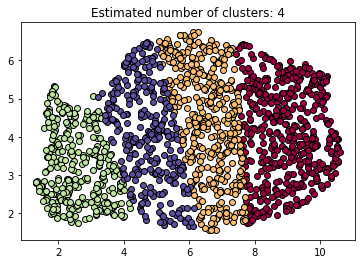

In [37]:
labels = ms.labels_

core_samples_mask = np.zeros_like(labels, dtype=bool)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = train[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = train[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % len(unique_labels))
plt.show()

In [38]:
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(scaled_stats['genre'], ms.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(scaled_stats['genre'], ms.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(scaled_stats['genre'], ms.labels_))

Homogeneity: 0.106
Completeness: 0.108
V-measure: 0.107


In [39]:
scaled_stats.groupby(['genre', 'cluster']).size()

genre       cluster
Electronic  0          166
            1          127
            2           49
            3           58
Folk        0           17
            1           91
            2          147
            3          145
Hiphop      0          222
            1          121
            2           18
            3           39
Rock        0           97
            1           88
            2          134
            3           81
dtype: int64

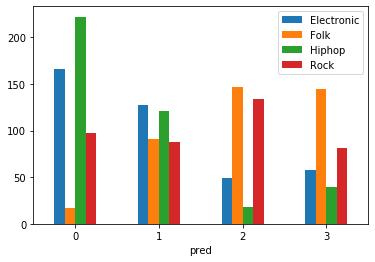

In [44]:
#plot distribution
results = pd.DataFrame()
results['genre'] = scaled_stats['genre']
results = pd.get_dummies(results['genre'])
results['pred'] = ms.labels_
results = results.groupby(['pred']).sum()
results.plot.bar(rot=0)